In [92]:
import numpy as np
import pandas as pd
from ISLP import load_data
from ISLP.models import ModelSpec, summarize
import statsmodels.api as sm
from matplotlib.pyplot import subplots
from statsmodels.stats.anova import anova_lm

from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF

In [93]:
dataset: pd.DataFrame = load_data("Auto")
dataset[:10]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
ford galaxie 500,15.0,8,429.0,198,4341,10.0,70,1
chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1
plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1
pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1


In [ ]:
# dataset["horsepower"] = np.log(dataset["horsepower"])
# dataset["horsepower"]

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement

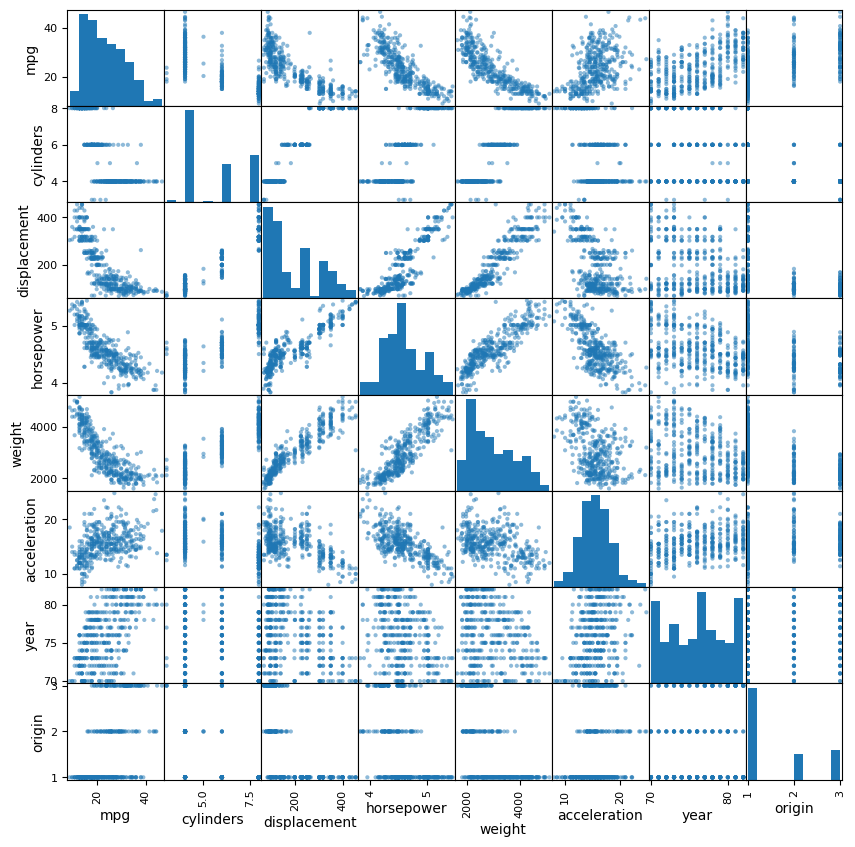

In [79]:
pd.plotting.scatter_matrix(dataset, figsize=(10, 10))

In [4]:
dataset.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [5]:
total_design = ModelSpec(dataset.columns.drop(["mpg"]))
X = total_design.fit_transform(dataset)
Y = dataset["mpg"]

In [6]:
total_model = sm.OLS(Y, X)
total_results = total_model.fit()
print(f"{total_results.rsquared=}")
summarize(total_results)

total_results.rsquared=0.8214780764810597


,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [86]:
variables = dataset.columns.drop(["mpg"])
individual_designs = [ModelSpec([column]) for column in variables]
# individual_designs = [ModelSpec([column]) for column in ["mpg"]]
individual_Xs = [design.fit_transform(dataset) for design in individual_designs]
individual_models = [sm.OLS(Y, x) for x in individual_Xs]
individual_results = [model.fit() for model in individual_models]

for idx, result in enumerate(individual_results):
    print(f"For '{variables[idx]}'")
    print(f"R squared = {result.rsquared}")
    print(summarize(result))
    print("--------\n")

For 'cylinders'
R squared = 0.6046889889441246
              coef  std err       t  P>|t|
intercept  42.9155    0.835  51.404    0.0
cylinders  -3.5581    0.146 -24.425    0.0
--------

For 'displacement'
R squared = 0.6482294003193044
                 coef  std err       t  P>|t|
intercept     35.1206    0.494  71.033    0.0
displacement  -0.0601    0.002 -26.808    0.0
--------

For 'horsepower'
R squared = 0.6683347641192137
                coef  std err       t  P>|t|
intercept   108.6997    3.050  35.644    0.0
horsepower  -18.5822    0.663 -28.034    0.0
--------

For 'weight'
R squared = 0.6926304331206254
              coef  std err       t  P>|t|
intercept  46.2165    0.799  57.867    0.0
weight     -0.0076    0.000 -29.645    0.0
--------

For 'acceleration'
R squared = 0.1792070501562546
                coef  std err      t  P>|t|
intercept     4.8332    2.048  2.359  0.019
acceleration  1.1976    0.130  9.228  0.000
--------

For 'year'
R squared = 0.3370278133096227
      

In [83]:
comparasion = anova_lm(*individual_results)
comparasion.index = variables
comparasion

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
cylinders,390.0,9415.910391,0.0,NaN,NaN,NaN
displacement,390.0,8378.821617,-0.0,1037.088774,-inf,NaN
horsepower,390.0,7899.932087,-0.0,478.889529,-inf,NaN
weight,390.0,7321.233706,-0.0,578.698381,-inf,NaN
acceleration,390.0,19550.461912,-0.0,-12229.228206,inf,NaN
year,390.0,15791.330185,-0.0,3759.131727,-inf,NaN
origin,390.0,16209.755458,-0.0,-418.425272,inf,NaN


In [84]:
for idx, result in enumerate(individual_results):
    print(f"p-value for '{variables[idx]}' = {result.pvalues.iloc[0]:.4f}")


p-value for 'cylinders' = 0.0000
p-value for 'displacement' = 0.0000
p-value for 'horsepower' = 0.0000
p-value for 'weight' = 0.0000
p-value for 'acceleration' = 0.0188
p-value for 'year' = 0.0000
p-value for 'origin' = 0.0000


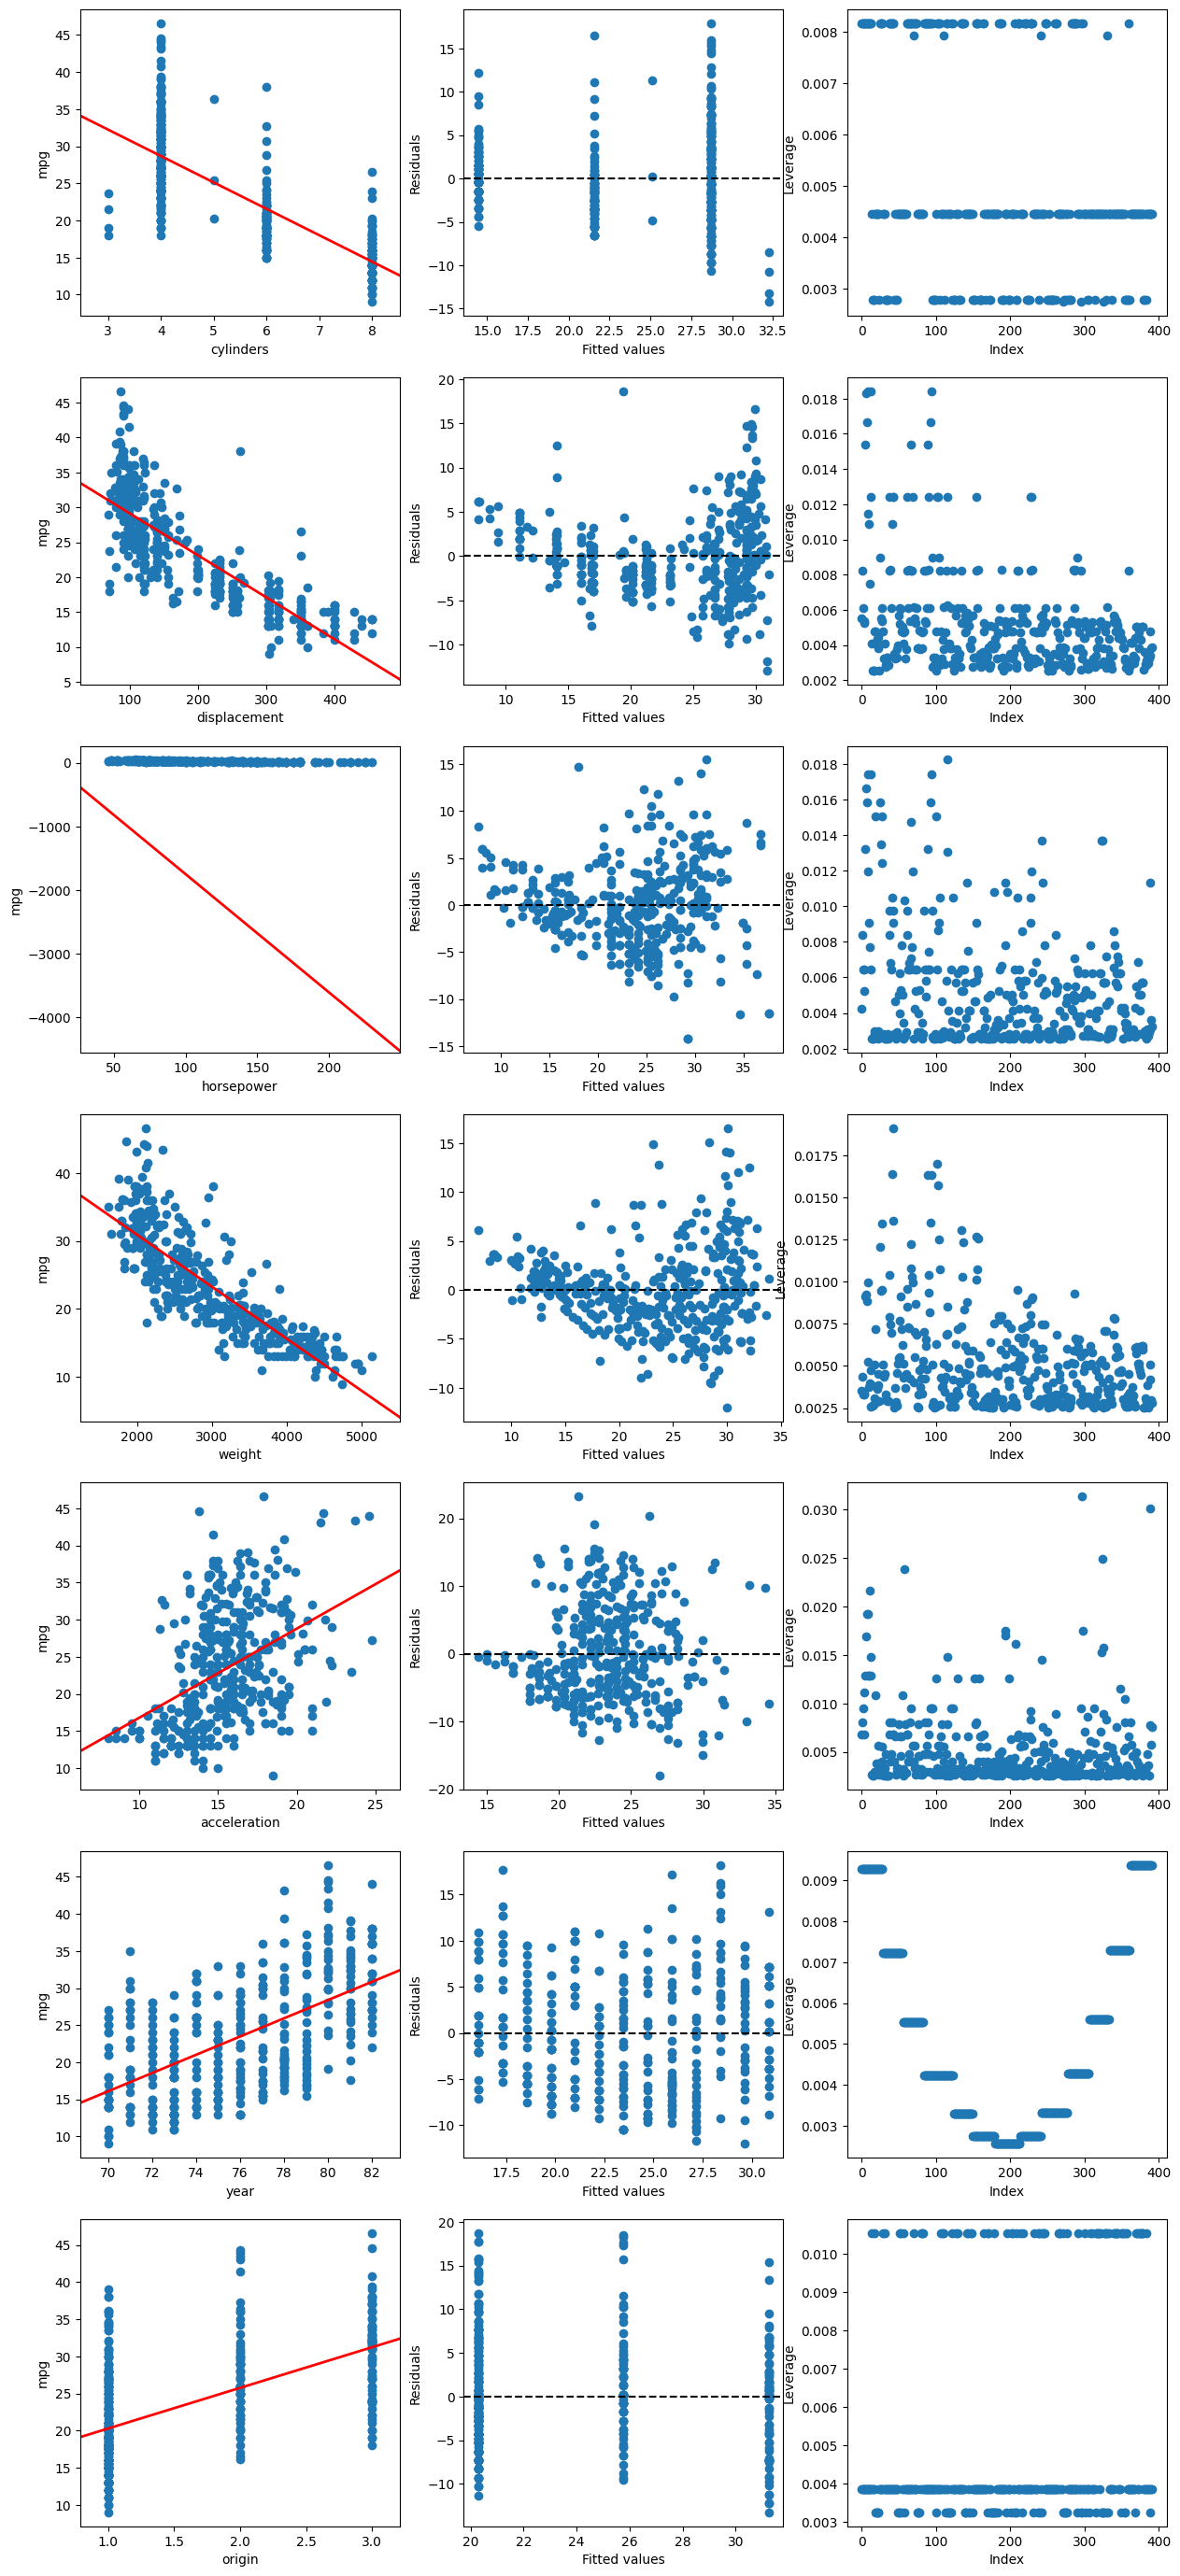

In [87]:
axs = subplots(len(variables), 3, figsize=(5*3, 5*len(variables)))[1]

for idx, ax_row in enumerate(axs):
    ax = ax_row[0]
    var = variables[idx]
    ax.scatter(X[var], Y)
    ax.set_xlabel(var)
    ax.set_ylabel("mpg")

    result = individual_results[idx]
    b = result.params.iloc[0]
    m = result.params.iloc[1]
    xlim = ax.get_xlim()
    ylim = [m*xlim[0] + b, m*xlim[1] + b]
    ax.axline((xlim[0], ylim[0]), (xlim[1], ylim[1]), c="r", ls="-", linewidth=2)

    ax = ax_row[1]
    ax.scatter(result.fittedvalues, result.resid)
    ax.set_xlabel("Fitted values")
    ax.set_ylabel("Residuals")
    ax.axhline(0, c="k", ls="--")

    ax = ax_row[2]
    infl = result.get_influence()
    ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
    ax.set_xlabel('Index')
    ax.set_ylabel('Leverage')
    np.argmax(infl.hat_matrix_diag)

In [88]:
design3 = ModelSpec(["weight", "cylinders", "displacement", ("cylinders", "displacement"), "horsepower"])
X_3 = design3.fit_transform(dataset)

model3 = sm.OLS(Y, X_3)
result3 = model3.fit()
print(f"{result3.rsquared=}")
summarize(result3)

result3.rsquared=0.7509769801382262


,coef,std err,t,P>|t|
intercept,92.8026,5.779,16.059,0.0
weight,-0.0033,0.001,-4.731,0.0
cylinders,-2.1986,0.484,-4.541,0.0
displacement,-0.0814,0.016,-5.130,0.0
cylinders:displacement,0.0116,0.002,6.140,0.0
horsepower,-10.0040,1.329,-7.526,0.0


In [89]:
# terms4 = dataset.columns.drop(["mpg"]).tolist() + [("cylinders", "displacement"), ("horsepower", "weight"), ("weight", "cylinders"), ("horsepower", "displacement")]
terms4 = dataset.columns.drop(["mpg"]).tolist() + [("cylinders", "displacement", "horsepower", "weight")]
design4 = ModelSpec(terms4)
X_4 = design4.fit_transform(dataset)
Y = dataset["mpg"]
model4 = sm.OLS(Y, X_4)
result4 = model4.fit()
print(f"{result4.rsquared=}")
summarize(result4)

result4.rsquared=0.864923495794622


,coef,std err,t,P>|t|
intercept,2.554990e+01,7.831000e+00,3.263,0.001
cylinders,-5.483000e-01,2.800000e-01,-1.961,0.051
displacement,-2.500000e-02,8.000000e-03,-3.122,0.002
horsepower,-8.336200e+00,1.409000e+00,-5.915,0.000
weight,-6.200000e-03,1.000000e-03,-9.285,0.000
acceleration,-1.096000e-01,9.700000e-02,-1.132,0.258
year,7.590000e-01,4.500000e-02,17.028,0.000
origin,6.167000e-01,2.560000e-01,2.413,0.016
cylinders:displacement:horsepower:weight,2.558000e-07,2.870000e-08,8.904,0.000


In [90]:
anova_lm(total_results, result4)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,384.0,4252.212530,0.0,NaN,NaN,NaN
1,383.0,3217.386372,1.0,1034.826159,123.186454,5.255237e-25


In [91]:
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({"vif": vals}, index=X.columns[1:])
vif

,vif
cylinders,10.737535
displacement,21.836792
horsepower,9.943693
weight,10.831260
acceleration,2.625806
year,1.244952
origin,1.772386
